# ❤️‍🔥 Speed Dating with Tinder ❤️‍🔥

### 🎯 Goal

##### Tinder's marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand what makes people interested into each other.

### ❓ Question

##### We will try to find an answer to this question : how does the importance of race for the participants of the dating influence the desire of meeting once again ?

### 📚 Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"

### 🧹 Cleaning the data 

In [ ]:
speed_dating_df = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
speed_dating_df.head()

,ï»¿iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# This is a huge dataset with 195 columns so we'll keep only those who are important to answer our problematic :
df = speed_dating_df[['ï»¿iid', 'gender', 'age', 'race', 'imprace', 'zipcode']].drop_duplicates()
df['gender'] = df['gender'].apply(lambda x: 'Women' if x == 0 else 'Men')
df['ï»¿iid'] = df['ï»¿iid'].unique()
df.head()

,ï»¿iid,gender,age,race,imprace,zipcode
0,1,Women,21.0,4.0,2.0,"60,521"
10,2,Women,24.0,2.0,2.0,"35,223"
20,3,Women,25.0,2.0,8.0,"6,268"
30,4,Women,23.0,2.0,1.0,"77,096"
40,5,Women,21.0,2.0,8.0,"94,022"


### ♀️♂️ Importance accorded to partner's race 

The question asked to the participants is : "How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?"

In [ ]:
px.histogram(df, x='imprace', width=800, height=400, title="Importance accorded to partner's race")

In [ ]:
px.histogram(df, x='gender', y='imprace', histfunc='avg', width=800, height=400, title="Importance accorded to the partner's race per gender")

##### We observe that race is much more important for women than for men !

### 🧑🏼‍🤝‍🧑🏽 Repartition of the participants in fonction of their race

In [ ]:
df['race'] = df['race'].apply(lambda x: 'Black/African American' if x==1.0
                    else 'European/Caucasian-American' if x==2.0
                    else 'Latino/Hispanic American' if x==3.0
                    else 'Asian/Pacific Islander/Asian-American' if x==4.0
                    else 'Native American' if x==5.0
                    else 'Other')
fig = px.pie(df, names='race', width=800, height=400)
fig.show()

##### 80% of the participants are either European/Caucasian-American, either Asian/Pacific Islander/Asian-American

### 🧑🏼‍🤝‍🧑🏽 Importance accorded to race per race

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['race'], y=df['imprace'], histfunc='avg', name='Race'))
fig.update_layout(
    title="Importance of race per race",
    width=800, height=400)
fig.show()

##### European/Caucasion-American people are much concerned about being the same race od the people they meet.

### 🗺️ Importance accorded to race and religion per US state
##### There's a column 'zipcode'. The question asked to the participants is 'What was the zip code of the area where you grew up?' I convert these zipcodes to the matching US state using the uszipcode python library in order to visualize the importance accorded to race and religion in function to the US states

In [ ]:
pip install uszipcode -q

In [ ]:
df = df.dropna(subset=['zipcode'])

In [ ]:
df['zipcode'] = df['zipcode'].apply(lambda x: int(x.replace(',', '')))

In [ ]:
from uszipcode import SearchEngine
engine = SearchEngine()
def state(zipcode):
    try:
        zipcode = engine.by_zipcode(zipcode)
        return zipcode.state
    except:
        zipcode = zipcode

df['state'] = df['zipcode'].apply(lambda x: state(x))

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [ ]:
state_df = pd.DataFrame(df.groupby('state')['imprace'].mean())
state_df.head()

,imprace
state,
AE,7.000000
AL,1.333333
AZ,4.000000
CA,3.425926
CO,3.375000


In [ ]:
px.choropleth(state_df, locations=state_df.index, color='imprace',
                           locationmode="USA-states",
                           range_color=(0, 10),
                           scope="usa", width=800, height=400,
                           title='Importance accorded to race per US state')

##### Midwest states seem more concerned about race.

### 😍 Importance of meeting someone of the same race
##### People who declared this is important for them meeting someone of the same race are they really more seduced by people who hace the same race ?

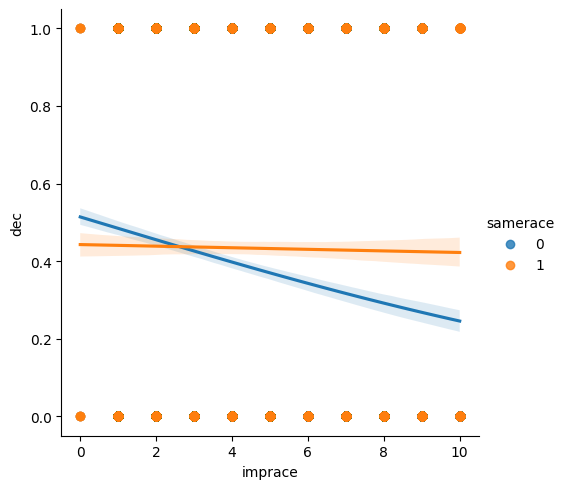

In [ ]:
sns.lmplot(speed_dating_df, x='imprace', y='dec', hue='samerace', logistic=True)

##### Meeting someone of the same race seem to really have an influence for people who declared it was important for them !

### ⁉️ Conclusion
##### Asking the question to the Tinder's users seems to be a good decision. We can suggest to them propose mostly people of the same race.